<div class="alert alert-info" role="alert">
 <p class ="lead"> 
 <h1>Física estadística </h1>
 <h2>Tarea 1</h2>
 </div>

Aquino Chapa Martha Abril

In [1]:
using Plots
using LaTeXStrings
using DelimitedFiles
using ExcelFiles
using XLSX
using DataFrames
using StatsBase

### Ejercicio 1:

a) Lanzando 100 veces una moneda, el número de soles obtenidos fuerón 61.

b) 1000 volados utilizando un generador aleatorio (a computadora).

In [39]:
#Creamos una función que nos cuente el número de soles que hay en n tiradas aleatorias.
function num_soles(n)
    sol=0
    for i in 1:n
       sol+=rand((1,0))
    end
    return sol
end     

num_soles (generic function with 1 method)

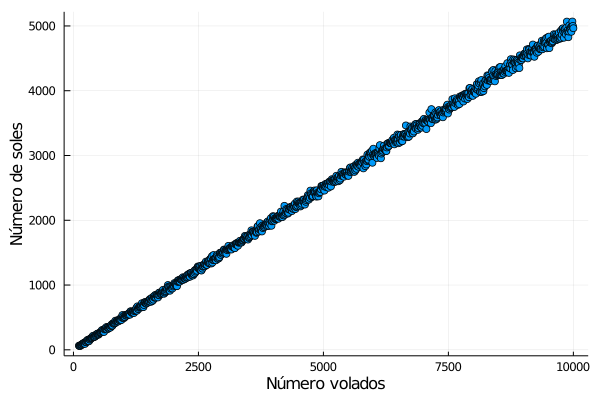

In [48]:
#Omitimos el valor de 100 tiradas debido a que esas se hicierón manuales
volados=collect(100:10:10000)
soles=[]
for i in volados
    soles=push!(soles,num_soles(i))
end
scatter(volados[2:end],soles[2:end],xlabel="Número volados",ylabel="Número de soles")
scatter!(100,61)
plot!(legend=false)

In [62]:
print("Con $(volados[91]) tiradas se obtuvo $(soles[91]) soles.")

Con 1000 tiradas se obtuvo 519 soles.

In [65]:
print("Con $(volados[end]) tiradas se obtuvo $(soles[end]) soles.")

Con 10000 tiradas se obtuvo 4965 soles.

#### Ejercicio 4: Más de caminantes aleatorios... más alcohol
Para el sistema planteado en el inciso 3a), elabora 1000 listas (1000 caminantes) de 30 pasos cada
una. Utiliza para ello un código en tu lenguaje favorito (incluye a tu tarea como apéndice el código,
todo en un mismo pdf). Cada una de estas listas está conformada por instancias o realizaciones de
las siguientes variables aleatorias $X_i$:

$\{X_1, X_2,X_3, ...,X_{29}, X_{30}\}$
Nota: Para generar estas listas en Python, puedes utilizar la función “random.choices”. Por ejemplo,
la siguiente función regresa un arreglo con 30 realizaciones de números al azar de entre {−1, 0, 1},
donde las probabilidades son 1/3 para cada una de ellas:
random.chices ([ −1 , 0 , 1] , w eig h t s = (1/3 ,1/3 ,1/3 ) , k=30).

Cada uno de estos elementos es la magnitud de un paso, es decir, cada uno de los elementos $X_i$ de
la ec (2). Para obtener la trayectoria de la caminata lo  ́unico que tienes que hacer es ir sumando
sucesivamente cada uno de estos elementos (la posición final de la caminata es, entonces, la suma
total de todos esos resultados).

Nota que cada una de estas 1000 caminatas podemos entenderla como una realización de la variable
aleatoria $Y_i$ como la definimos en la ec. (1). De esta manera, esperamos que si tomáramos un número
infinito de realizaciones (es decir, caminatas), recobraríamos la estadística que obtuviste en el inciso
3a). Pero, ¿qué pasaría si el número de realizaciones es finito? Veamos:

a) Gráfica 20 de las (1000) listas junto con la desviaci ́on est ́andar de la expresión analítica que
encontraste para este sistema en el inciso 3a). Debes encontrar algo parecido a esto:

In [ ]:
function caminatas(n)
    valores = [1,-1,0]
    probabilidad = [1/3,1/3,1/3]
    
end

In [4]:
valores = [1,-1,0]
probabilidad = [1/3,1/3,1/3]
listas=zeros(30,1000)
for i in 1:1000
    for j in 1:30
       listas[j,i]=sample(valores, Weights(probabilidad))
    end
end

Ahora para obtener la posición del caminante en el n's paso

In [5]:
posicion=zeros(30,1000)
for i in 1:1000
    posicion[1,i]=listas[1,i]
    for j in 2:30
        posicion[j,i]=listas[j,i]+posicion[j-1,i]
    end
end

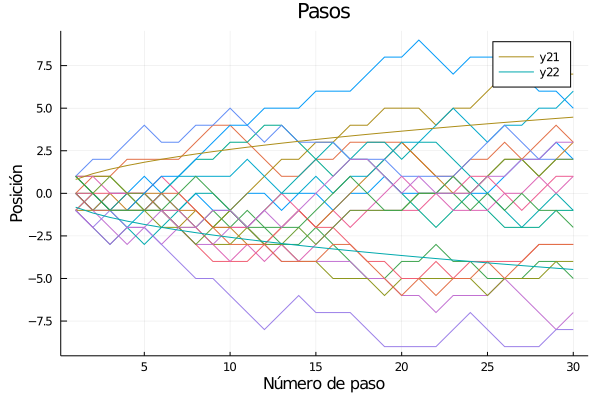

In [38]:
n=collect(1:1:30)
des_estandar=(2*n/3).^(1/2)
plot(title="Pasos",xlabel="Número de paso",ylabel="Posición")
for j in 1:20
    plot!(posicion[:,j],label=false)
end
plot!(n,des_estandar)
plot!(n,-des_estandar)
plot!()